## Drivers of Growth: The Impact of Exchange Rate Movements, Remittances, and Exports on Philippine Economic Growth

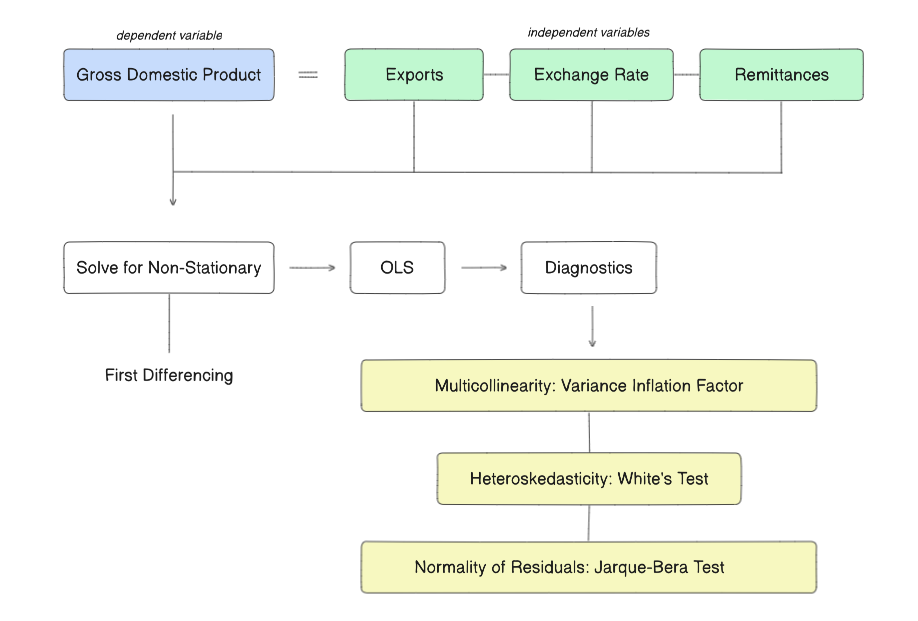

In [1]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_excel('intl_econ_data.xlsx')

In [19]:
df

,YRQR,GDP,Exchage Rate,REMITTANCES,EXPORT,EX X R,EX X E,R X E
0,2005Q1,2071140,55.0064,3005,554058.2,165294.2320,3.047675e+07,1.664945e+09
1,2005Q2,2195369,54.6706,3317,588844.8,181342.3802,3.219250e+07,1.953198e+09
2,2005Q3,2117985,56.0382,3444,635777.5,192995.5608,3.562783e+07,2.189618e+09
3,2005Q4,2389831,54.6267,3329,661017.4,181852.2843,3.610920e+07,2.200527e+09
4,2006Q1,2164381,51.8843,3314,641771.3,171944.5702,3.329785e+07,2.126830e+09
...,...,...,...,...,...,...,...,...
75,2023Q4,5884528,56.0629,9968,1661319.5,558834.9872,9.313839e+07,1.656003e+10
76,2024Q1,5195588,55.9621,9151,1701048.1,512109.1771,9.519422e+07,1.556629e+10
77,2024Q2,5539083,57.8029,8954,1621893.3,517567.1666,9.375014e+07,1.452243e+10
78,2024Q3,5316054,57.2497,9967,1746470.9,570607.7599,9.998494e+07,1.740708e+10


## Testing if Stationary

In [28]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller(df['GDP'])

(np.float64(0.3951695539817122),
 np.float64(0.9813133991121714),
 8,
 71,
 {'1%': np.float64(-3.526004646825607),
  '5%': np.float64(-2.9032002348069774),
  '10%': np.float64(-2.5889948363419957)},
 np.float64(1784.9625584644673))

In [36]:
adfuller(df['Exchage Rate'])

(np.float64(-0.9893492891591439),
 np.float64(0.7571290544275795),
 2,
 77,
 {'1%': np.float64(-3.518281134660583),
  '5%': np.float64(-2.899878185191432),
  '10%': np.float64(-2.5872229937594873)},
 np.float64(237.1528022493652))

In [37]:
adfuller(df['REMITTANCES'])

(np.float64(-1.7686692665190211),
 np.float64(0.39612368604170833),
 3,
 76,
 {'1%': np.float64(-3.5194805351545413),
  '5%': np.float64(-2.9003945086747343),
  '10%': np.float64(-2.5874984279778395)},
 np.float64(912.1903845944803))

In [38]:
adfuller(df['EXPORT'])

(np.float64(1.1071671064278596),
 np.float64(0.9952773291020887),
 10,
 69,
 {'1%': np.float64(-3.528889992207215),
  '5%': np.float64(-2.9044395987933362),
  '10%': np.float64(-2.589655654274312)},
 np.float64(1711.4855262609506))

### Running all 4 variables shows that all of them are non-stationary, will proceed to first diff

In [45]:
df['d1GDP'] = df['GDP'].diff()
df['d1Exchange_Rate'] = df['Exchage Rate'].diff()
df['d1Remittances'] = df['REMITTANCES'].diff()
df['d1Export'] = df['EXPORT'].diff()

In [46]:
df.head()

,YRQR,GDP,Exchage Rate,REMITTANCES,EXPORT,EX X R,EX X E,R X E,d1GDP,d1Exchange_Rate,d1Remittances,d1Export
0,2005Q1,2071140,55.0064,3005,554058.2,165294.2320,3.047675e+07,1.664945e+09,NaN,NaN,NaN,NaN
1,2005Q2,2195369,54.6706,3317,588844.8,181342.3802,3.219250e+07,1.953198e+09,124229.0,-0.3358,312.0,34786.6
2,2005Q3,2117985,56.0382,3444,635777.5,192995.5608,3.562783e+07,2.189618e+09,-77384.0,1.3676,127.0,46932.7
3,2005Q4,2389831,54.6267,3329,661017.4,181852.2843,3.610920e+07,2.200527e+09,271846.0,-1.4115,-115.0,25239.9
4,2006Q1,2164381,51.8843,3314,641771.3,171944.5702,3.329785e+07,2.126830e+09,-225450.0,-2.7424,-15.0,-19246.1


### Running adf test on first diff

In [49]:
adfuller(df['d1GDP'].dropna())

(np.float64(-2.8121049746676925),
 np.float64(0.05656535458104617),
 7,
 71,
 {'1%': np.float64(-3.526004646825607),
  '5%': np.float64(-2.9032002348069774),
  '10%': np.float64(-2.5889948363419957)},
 np.float64(1757.7101065795985))

In [50]:
adfuller(df['d1Exchange_Rate'].dropna())

(np.float64(-7.177433193316953),
 np.float64(2.704263381595358e-10),
 1,
 77,
 {'1%': np.float64(-3.518281134660583),
  '5%': np.float64(-2.899878185191432),
  '10%': np.float64(-2.5872229937594873)},
 np.float64(232.21772165290378))

In [51]:
adfuller(df['d1Remittances'].dropna())

(np.float64(-6.611968545237024),
 np.float64(6.343789030517037e-09),
 3,
 75,
 {'1%': np.float64(-3.520713130074074),
  '5%': np.float64(-2.9009249540740742),
  '10%': np.float64(-2.5877813777777776)},
 np.float64(895.6751966892933))

In [52]:
adfuller(df['d1Export'].dropna())

(np.float64(-4.006402254220699),
 np.float64(0.0013773557158434648),
 8,
 70,
 {'1%': np.float64(-3.5274258688046647),
  '5%': np.float64(-2.903810816326531),
  '10%': np.float64(-2.5893204081632653)},
 np.float64(1686.3181788495713))

## They are now all stationary after first difference

# OLS

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df.columns

Index(['YRQR', 'GDP', 'Exchage Rate', 'REMITTANCES', 'EXPORT', 'EX X R',
       'EX X E', 'R X E', 'd1GDP', 'd1Exchange_Rate', 'd1Remittances',
       'd1Export'],
      dtype='object')

In [114]:
clean_data = {
    'GDP': df['GDP'],
    'Exchange Rate': df['Exchage Rate'],
    'Remittances': df['REMITTANCES'],
    'Export': df['EXPORT']
}

clean_data = pd.DataFrame(clean_data)

In [113]:
clean_data

,GDP,Exchange Rate,Remittances,Export
0,2071140,55.0064,3005,554058.2
1,2195369,54.6706,3317,588844.8
2,2117985,56.0382,3444,635777.5
3,2389831,54.6267,3329,661017.4
4,2164381,51.8843,3314,641771.3
...,...,...,...,...
75,5884528,56.0629,9968,1661319.5
76,5195588,55.9621,9151,1701048.1
77,5539083,57.8029,8954,1621893.3
78,5316054,57.2497,9967,1746470.9


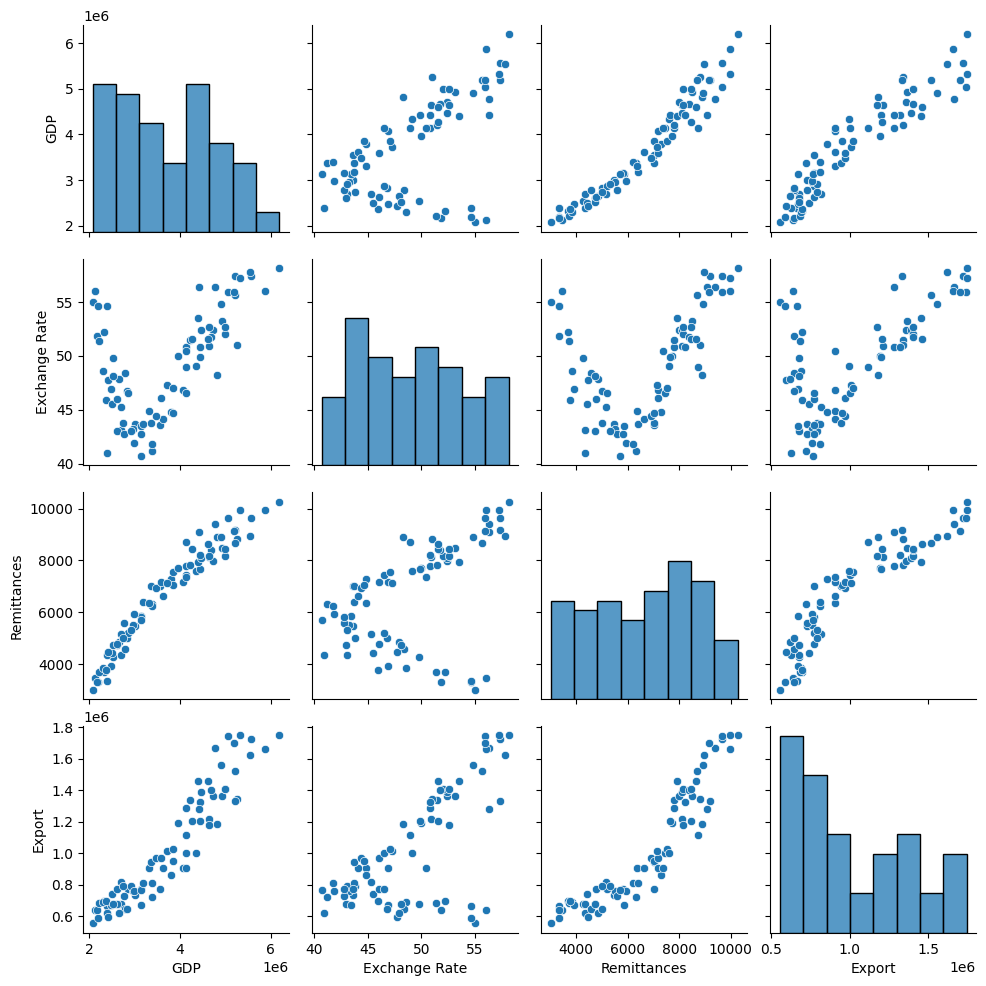

In [124]:
sns.pairplot(clean_data)

In [62]:
import statsmodels.api as sm

In [64]:
#define response variable
y = df['d1GDP'].dropna()

#define predictor variables
x = df[['d1Exchange_Rate', 'd1Remittances', 'd1Export']].dropna()

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [66]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  d1GDP   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     12.94
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           6.74e-07
Time:                        14:14:43   Log-Likelihood:                -1113.3
No. Observations:                  79   AIC:                             2235.
Df Residuals:                      75   BIC:                             2244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.397e+04   3.79e+04     

### OLS shows that Remittances and Exports are significant at 0.05.

## Scatterplot of each independent variable and dependent variable

<Axes: xlabel='GDP', ylabel='Exchange Rate'>

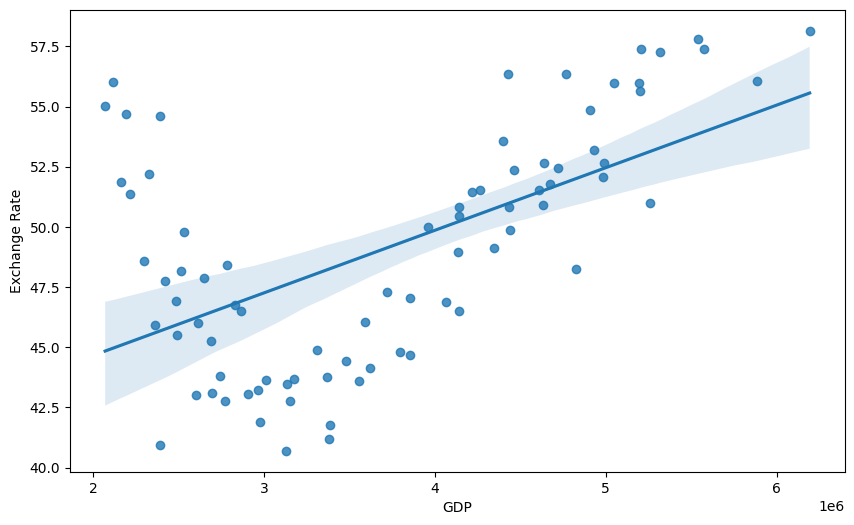

In [120]:
plt.figure(figsize=(10,6))
sns.regplot(x="GDP", y="Exchange Rate", data=clean_data)

<Axes: xlabel='GDP', ylabel='Remittances'>

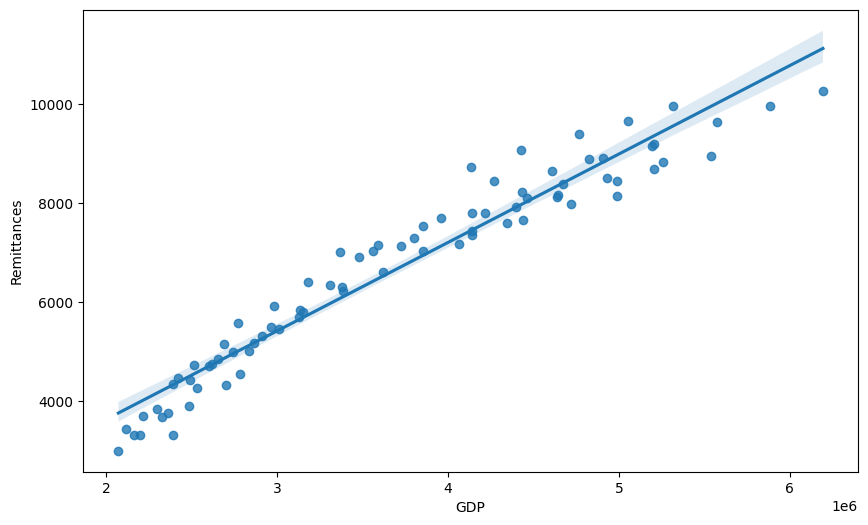

In [121]:
plt.figure(figsize=(10,6))
sns.regplot(x="GDP", y="Remittances", data=clean_data)

<Axes: xlabel='GDP', ylabel='Export'>

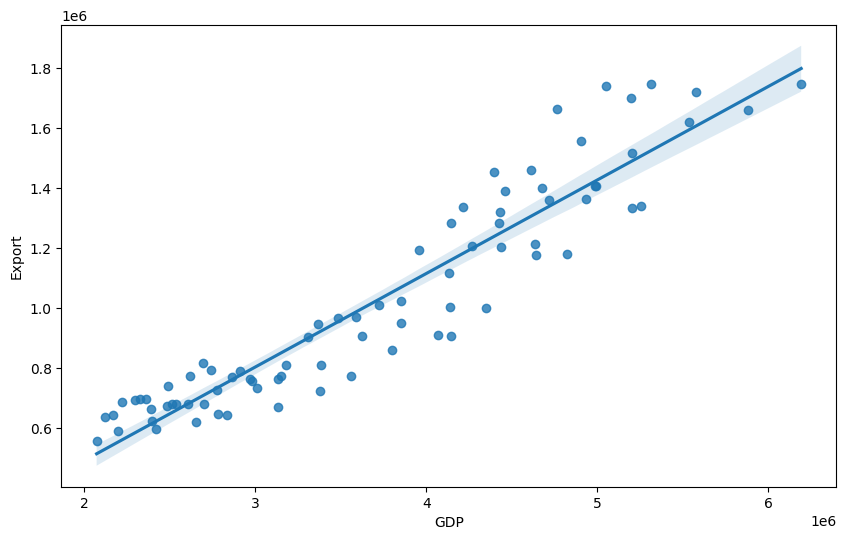

In [122]:
plt.figure(figsize=(10,6))
sns.regplot(x="GDP", y="Export", data=clean_data)

## Checking Multicollinearity using VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
X = df[['GDP', 'Exchage Rate', 'REMITTANCES', 'EXPORT']].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0           GDP  314.065360
1  Exchage Rate   18.358039
2   REMITTANCES  208.650259
3        EXPORT   76.077320


In [57]:
X = df[['d1GDP', 'd1Exchange_Rate', 'd1Remittances', 'd1Export']].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0            d1GDP  1.527844
1  d1Exchange_Rate  1.050114
2    d1Remittances  1.545971
3         d1Export  1.351473


## Checking Heteroskedasticity using White's Test

In [68]:
from statsmodels.stats.diagnostic import het_white

In [69]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(15.999875886719403), 'Test Statistic p-value': np.float64(0.0668841796290337), 'F-Statistic': np.float64(1.9470710075261126), 'F-Test p-value': np.float64(0.05930901634010669)}


## Checking Normality

Jarque-Bera test is already in the OLS, this section only shows the normal curves of each variables

In [80]:
gdp = df['GDP']
st_gdp = df['d1GDP']

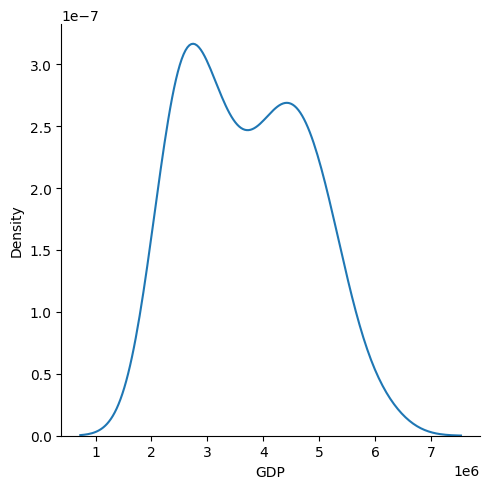

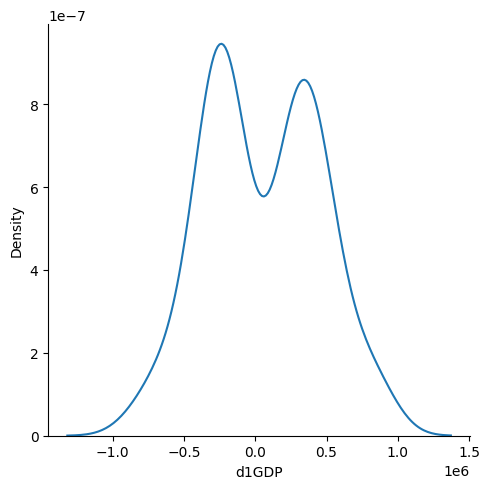

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(gdp, kind="kde")
sns.displot(st_gdp, kind="kde")

plt.show()

In [82]:
df.columns

Index(['YRQR', 'GDP', 'Exchage Rate', 'REMITTANCES', 'EXPORT', 'EX X R',
       'EX X E', 'R X E', 'd1GDP', 'd1Exchange_Rate', 'd1Remittances',
       'd1Export'],
      dtype='object')

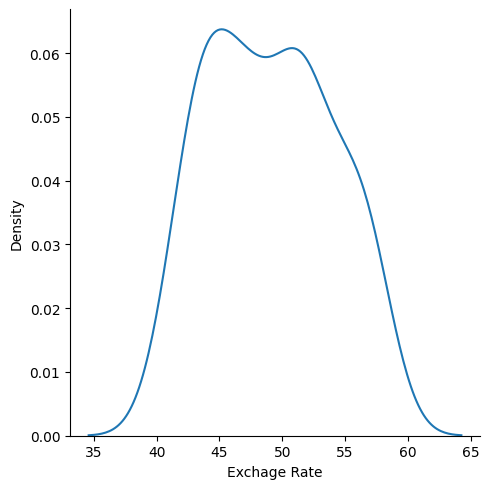

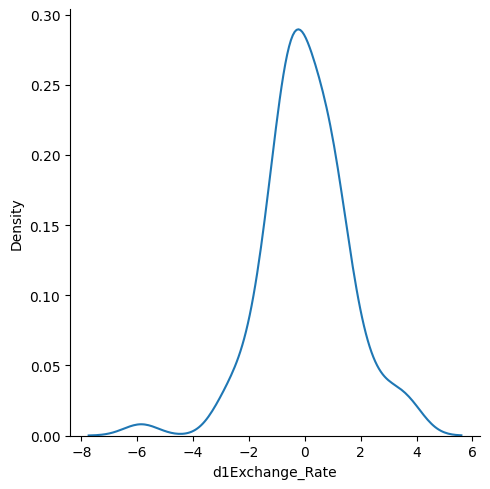

In [84]:
Exchange_rate = df['Exchage Rate']
st_exchange_rate = df['d1Exchange_Rate']

sns.displot(Exchange_rate, kind="kde")
sns.displot(st_exchange_rate, kind="kde")

plt.show()

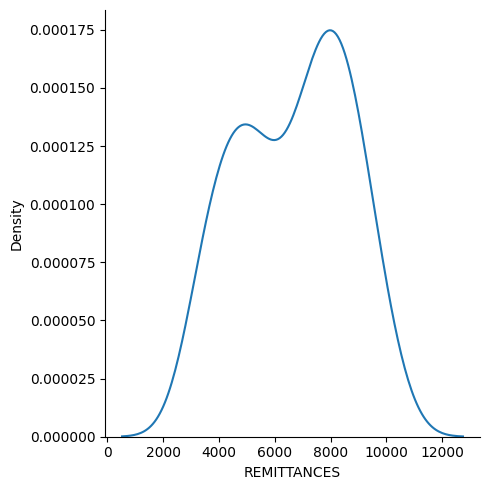

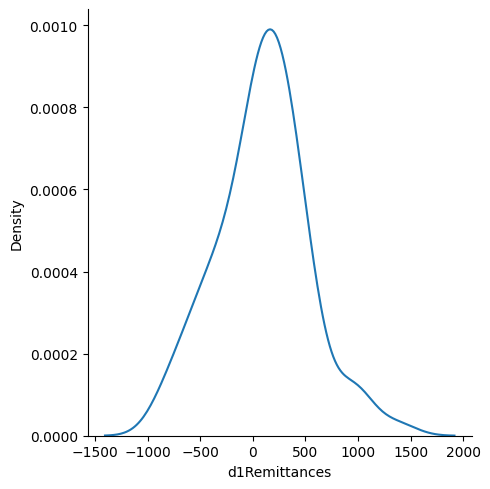

In [85]:
Remittances = df['REMITTANCES']
st_remittances = df['d1Remittances']

sns.displot(Remittances, kind="kde")
sns.displot(st_remittances, kind="kde")

plt.show()

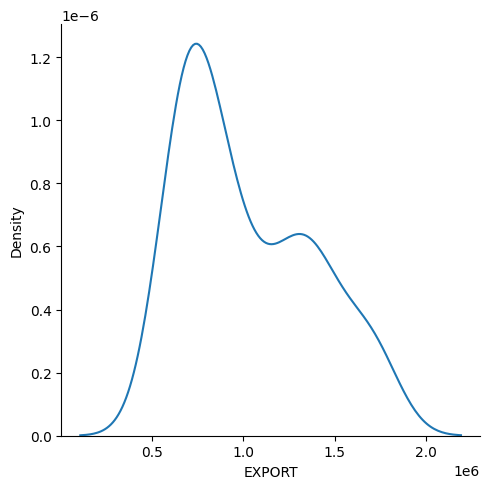

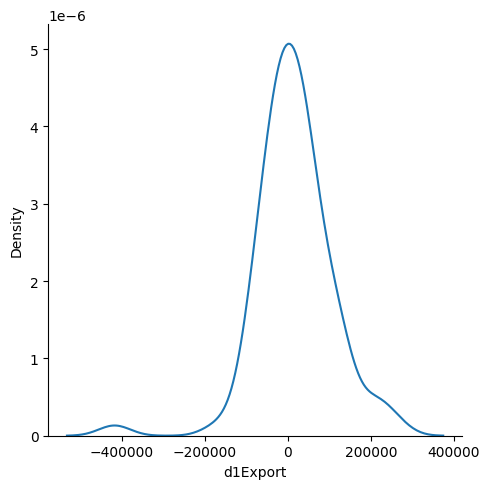

In [86]:
Export = df['EXPORT']
st_export = df['d1Export']

sns.displot(Export, kind="kde")
sns.displot(st_export, kind="kde")

plt.show()